#Problem Definition

The oil and gas industry is under increasing pressure to reduce its carbon footprint. This project aims to analyze the historical carbon intensity of major oil and gas companies to understand the evolution of emissions relative to production and identify trends and patterns.

#Features

Numerical
1- year  
2- production_value  
3- total_emissions_MtCO2e - Our Main target

Categorical
1- parent_entity           
2- parent_type             
3- commodity               
4- production_unit      


In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/emissions_medium_granularity.csv')
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [2]:
#The value in commodity

df['commodity'].unique()


array(['Oil & NGL', 'Natural Gas', 'Sub-Bituminous Coal',
       'Metallurgical Coal', 'Bituminous Coal', 'Thermal Coal',
       'Anthracite Coal', 'Cement', 'Lignite Coal'], dtype=object)

#Exploratory Data Analysis (EDA)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [4]:
df.shape

(12551, 7)

In [5]:
df.isnull().sum()

,0
year,0
parent_entity,0
parent_type,0
commodity,0
production_value,0
production_unit,0
total_emissions_MtCO2e,0


In [6]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [7]:
df.describe(include='all')

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
count,12551.000000,12551,12551,12551,12551.000000,12551,12551.000000
unique,NaN,122,3,9,NaN,4,NaN
top,NaN,Westmoreland Mining,Investor-owned Company,Oil & NGL,NaN,Million tonnes/yr,NaN
freq,NaN,507,6583,3733,NaN,5103,NaN
mean,1987.148116,NaN,NaN,NaN,412.677443,NaN,113.205850
std,29.202455,NaN,NaN,NaN,1357.538128,NaN,329.789848
min,1854.000000,NaN,NaN,NaN,0.004398,NaN,0.000321
25%,1973.000000,NaN,NaN,NaN,10.601353,NaN,8.785294
50%,1994.000000,NaN,NaN,NaN,63.203536,NaN,33.058688
75%,2009.000000,NaN,NaN,NaN,320.664764,NaN,102.154596


The dataset appears to contain information about emissions from various entities in the oil and gas industry. The total_emissions_MtCO2e column seems to be the target variable for our analysis. We will start by looking at the distribution of emissions across different parent_entity and commodity types, and then examine the trend of total emissions over time.

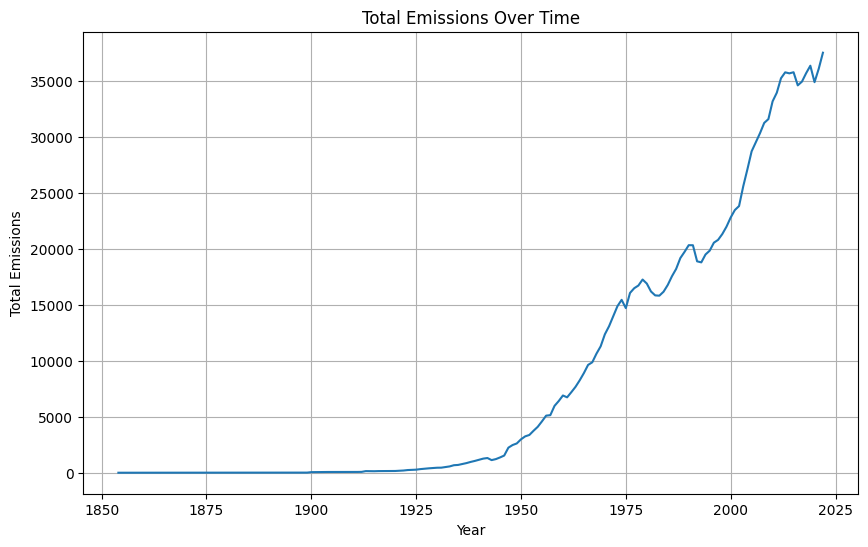

In [8]:
# Total emissions over time

import matplotlib.pyplot as plt

# Group data by year and sum emissions
total_emissions = df.groupby('year')['total_emissions_MtCO2e'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(total_emissions.index, total_emissions.values)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time')
plt.grid(True)
plt.show()


The dataset provides emissions data at a medium granularity level, which means we have emissions broken down by company (parent_entity) and commodity type (commodity) over time (year). To gain a deeper understanding of the data, we will further explore the emissions by parent_type and analyze the distribution of production_value and total_emissions_MtCO2e. We will also visualize the emissions trends for the top emitters and commodities.

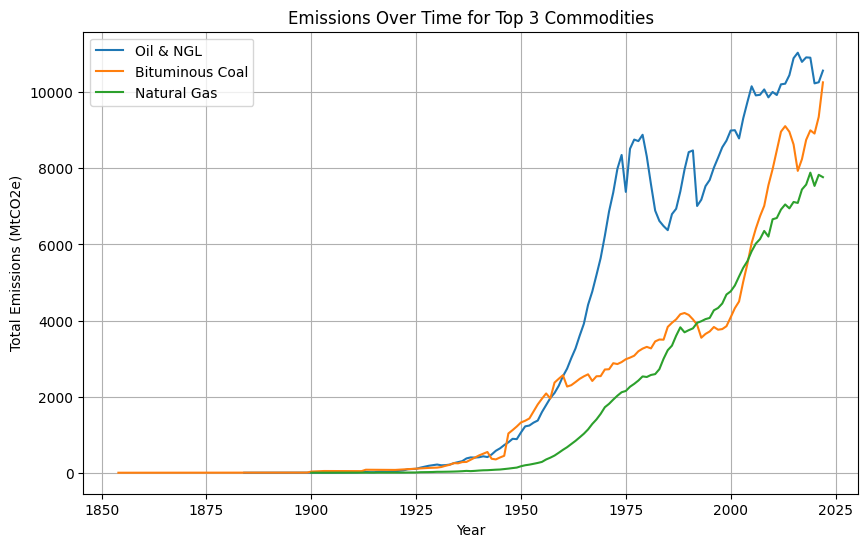

In [9]:
# Emissions over time for top 3 commodities

# Group data by commodity and year, then sum emissions
commodity_emissions = df.groupby(['commodity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 commodities by total emissions
top_commodities = commodity_emissions.groupby('commodity')['total_emissions_MtCO2e'].sum().nlargest(3).index

# Filter data for top commodities
top_commodity_emissions = commodity_emissions[commodity_emissions['commodity'].isin(top_commodities)]

# Create the plot
plt.figure(figsize=(10, 6))
for commodity in top_commodities:
  subset = top_commodity_emissions[top_commodity_emissions['commodity'] == commodity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 3 Commodities')
plt.legend()
plt.grid(True)
plt.show()


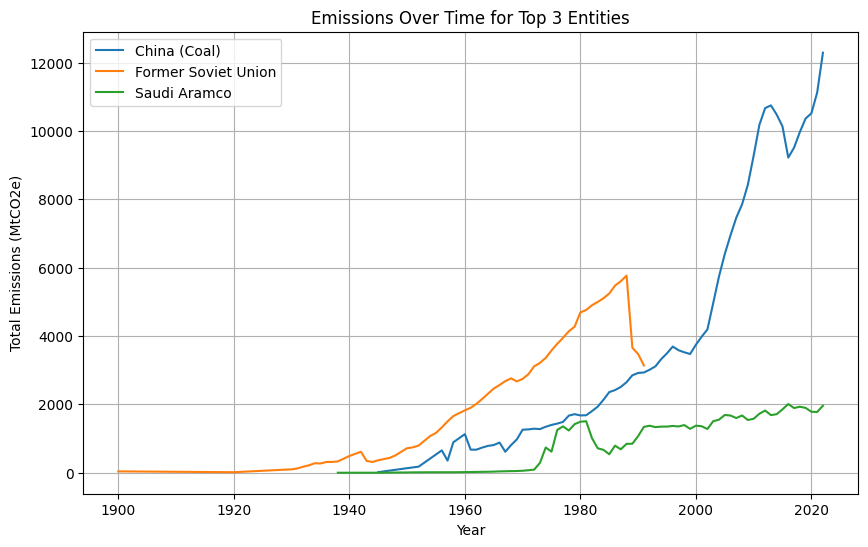

In [10]:
# Emissions over time for top 3 entities

# Group data by parent_entity and year, then sum emissions
entity_emissions = df.groupby(['parent_entity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 entities by total emissions
top_entities = entity_emissions.groupby('parent_entity')['total_emissions_MtCO2e'].sum().nlargest(3).index

# Filter data for top entities
top_entity_emissions = entity_emissions[entity_emissions['parent_entity'].isin(top_entities)]

# Create the plot
plt.figure(figsize=(10, 6))
for entity in top_entities:
  subset = top_entity_emissions[top_entity_emissions['parent_entity'] == entity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=entity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 3 Entities')
plt.legend()
plt.grid(True)
plt.show()


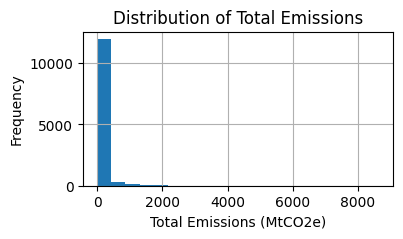

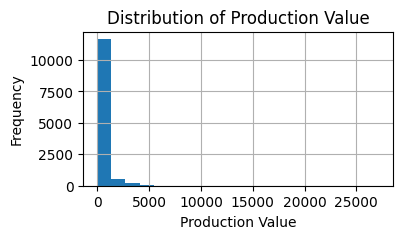

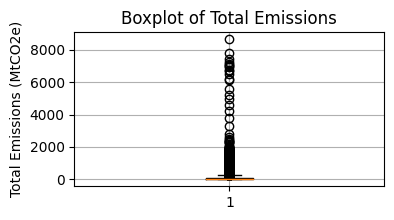

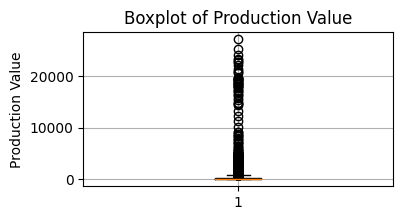

In [11]:
# Histograms for total emission and production_value - distribution of single variable and boxplot for outliers

# Create a histogram for total emissions
plt.figure(figsize=(4, 2))
plt.hist(df['total_emissions_MtCO2e'], bins=20)
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Emissions')
plt.grid(True)
plt.show()

# Create a histogram for production value
plt.figure(figsize=(4, 2))
plt.hist(df['production_value'], bins=20)
plt.xlabel('Production Value')
plt.ylabel('Frequency')
plt.title('Distribution of Production Value')
plt.grid(True)
plt.show()

# Create a boxplot for total emissions to identify outliers
plt.figure(figsize=(4, 2))
plt.boxplot(df['total_emissions_MtCO2e'])
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Boxplot of Total Emissions')
plt.grid(True)
plt.show()

# Create a boxplot for production value to identify outliers
plt.figure(figsize=(4, 2))
plt.boxplot(df['production_value'])
plt.ylabel('Production Value')
plt.title('Boxplot of Production Value')
plt.grid(True)
plt.show()


Emissions Landscape:

The dataset encompasses 122 unique entities and covers 9 distinct commodity types.
The majority of entities are classified as "Investor-owned Company," followed by "State-owned Entity" and "Nation State."
"Oil & NGL" emerges as the commodity with the highest total emissions, surpassing coal and natural gas.

Emissions Distribution:

The distribution of production_value and total_emissions_MtCO2e is heavily right-skewed, indicating a few entities with exceptionally high production and emissions.
The presence of outliers in both production value and emissions underscores the variability within the industry. These outliers could represent large-scale operations or entities with less efficient production processes.

Emissions Trends:

Total emissions have generally increased over time, with a steeper rise observed in recent years. This trend highlights the growing environmental impact of the industry and the urgent need for decarbonization efforts.
The top three emitting entities ("China (Coal)", "Former Soviet Union", and "Saudi Aramco") exhibit distinct emission trajectories, with "China (Coal)" showing a particularly rapid increase in recent years.
Among the top three commodities, emissions from "Oil & NGL" and "Bituminous Coal" have risen considerably, while "Natural Gas" emissions show a less pronounced increase.

#**Data Processing**

In [12]:
# Normalize data - production_value and total_emissions_MtCO2e by using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create a MinMaxScaler object

# Fit and transform the 'production_value' and 'total_emissions_MtCO2e' column
df['production_value_normalized'] = scaler.fit_transform(df[['production_value']])
df['total_emissions_MtCO2e_normalized'] = scaler.fit_transform(df[['total_emissions_MtCO2e']])


df.head()


,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e,production_value_normalized,total_emissions_MtCO2e_normalized
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885,0.000033,0.000042
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355,0.000068,0.000016
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770,0.000067,0.000084
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453,0.000163,0.000037
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079,0.000268,0.000337


In [13]:
# Show categorical variables and numerical

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns


print("Categorical variables:")
print(categorical_cols)

print("\nNumerical variables:")
print(numerical_cols)


Categorical variables:
Index(['parent_entity', 'parent_type', 'commodity', 'production_unit'], dtype='object')

Numerical variables:
Index(['year', 'production_value', 'total_emissions_MtCO2e',
       'production_value_normalized', 'total_emissions_MtCO2e_normalized'],
      dtype='object')


In [14]:
# Iterate anova for categorical variables 'parent_entity', 'parent_type', 'commodity', 'production_unit' and continuous variable 'total_emissions_MtCO2e'

from scipy import stats

categorical_cols = ['parent_entity', 'parent_type', 'commodity', 'production_unit']
continuous_col = 'total_emissions_MtCO2e'

for col in categorical_cols:
  groups = df[col].unique()
  fvalue, pvalue = stats.f_oneway(*[df['total_emissions_MtCO2e'][df[col] == g] for g in groups])
  print(f'ANOVA for {col}: F-value = {fvalue:.2f}, p-value = {pvalue:.3f}')


ANOVA for parent_entity: F-value = 30.86, p-value = 0.000
ANOVA for parent_type: F-value = 255.67, p-value = 0.000
ANOVA for commodity: F-value = 45.72, p-value = 0.000
ANOVA for production_unit: F-value = 25.06, p-value = 0.000


#Correlation Matrix

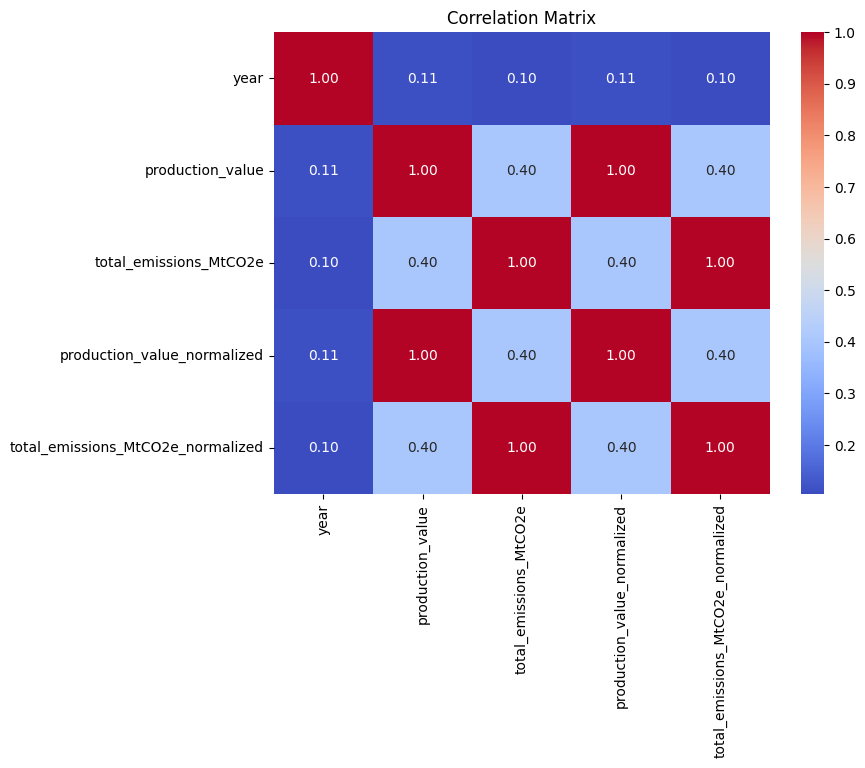

In [15]:
# correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr() # Calculate the correlation matrix

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

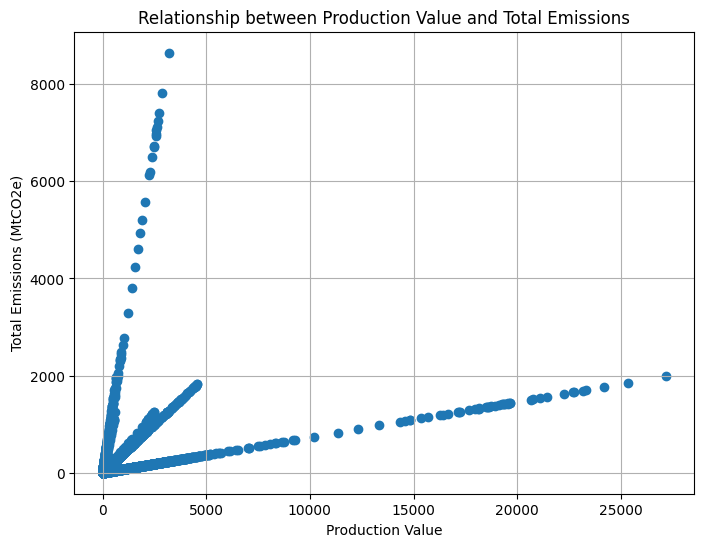

Correlation coefficient between production value and total emissions: 0.40


In [16]:
# Relationship between production value and total emissions

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['production_value'], df['total_emissions_MtCO2e'])
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Relationship between Production Value and Total Emissions')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['production_value'].corr(df['total_emissions_MtCO2e'])
print(f"Correlation coefficient between production value and total emissions: {correlation:.2f}")


#**Models Building**

##Selecting the features


## Model 1 - Linear Regression

###Feature 1

In [17]:
# Use linear regression to find r2 and mse for parent_entity', 'year', 'commodity', 'production_value vs total emissions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Select features and target variable
features = ['parent_entity', 'year', 'commodity', 'production_value']
target = 'total_emissions_MtCO2e'

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[features].select_dtypes(include=['object']))

# Combine encoded features with numerical features
X = np.concatenate((encoded_features.toarray(), df[features].select_dtypes(include=['number']).values), axis=1)
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 56107.27
R-squared (R2): 0.39


###Feature 2

In [18]:
# non linear regression polynomial to find r2 and mse for parent_entity', 'year', 'commodity', 'production_value vs total emissions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


features = ['parent_entity', 'year', 'commodity', 'production_value']
target = 'total_emissions_MtCO2e'


encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[features].select_dtypes(include=['object']))


X = np.concatenate((encoded_features.toarray(), df[features].select_dtypes(include=['number']).values), axis=1)
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a polynomial regression model (degree=2 for example)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.02
R-squared (R2): 1.00


###Feature 3 (feature engineering, linear)

In [19]:
# Find r2 and mse for production_value_x_production_unit_Million tonnes/yr vs total_emissions_MtCO2e

# Create a new feature by multiplying production_value and production_unit
df['production_value_x_production_unit'] = df['production_value'] * df['production_unit'].apply(lambda x: 1 if x == 'Million tonnes/yr' else 0)


X = df[['production_value_x_production_unit']]
y = df['total_emissions_MtCO2e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error (MSE): 25154.2878
R-squared: 0.7276


###Feature 4

In [20]:
# Use nonlinear regression to Find r2 and mse for production_value_x_production_unit_Million tonnes/yr vs total_emissions_MtCO2e
#this

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


X = df[['production_value_x_production_unit']]
y = df['total_emissions_MtCO2e']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial regression (degree 2)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())


polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error (MSE): 24694.3580
R-squared: 0.7326


###Features selection


 Based on the above, the highest R2 is from feature 2, parent_entity', 'year', 'commodity', 'production_value vs total emissions using non-linear regression polynomial = 100%

 Next, we will test the model with other Machine Learning Algorithm.

##Model 2 - Random Forest Regressor

In [21]:
# Non linear regression to find r2 and mse for parent_entity', 'year', 'commodity', 'production_value vs total emissions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['parent_entity', 'year', 'commodity', 'production_value']
target = 'total_emissions_MtCO2e'

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[features].select_dtypes(include=['object']))

# Combine encoded features with numerical features
X = np.concatenate((encoded_features.toarray(), df[features].select_dtypes(include=['number']).values), axis=1)
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 147.99
R-squared (R2): 1.00


##**Model 3 - XGBoost**

In [22]:
# prompt: use xgboost to train and test to find r2 and mse for parent_entity', 'year', 'commodity', 'production_value vs total emissions

!pip install xgboost
import xgboost as xgb

# Select features and target variable
features = ['parent_entity', 'year', 'commodity', 'production_value']
target = 'total_emissions_MtCO2e'

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[features].select_dtypes(include=['object']))

# Combine encoded features with numerical features
X = np.concatenate((encoded_features.toarray(), df[features].select_dtypes(include=['number']).values), axis=1)
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 380.73
R-squared (R2): 1.00


In [23]:
# prompt: cross validation for 5 times for non linear regression polynomial for parent_entity', 'year', 'commodity', 'production_value vs total emissions

from sklearn.model_selection import cross_val_score

# Select features and target variable
features = ['parent_entity', 'year', 'commodity', 'production_value']
target = 'total_emissions_MtCO2e'

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[features].select_dtypes(include=['object']))

# Combine encoded features with numerical features
X = np.concatenate((encoded_features.toarray(), df[features].select_dtypes(include=['number']).values), axis=1)
y = df[target]

# Create a polynomial regression model (degree=2 for example)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validation R-squared scores:", cv_scores)
print("Average R-squared score:", cv_scores.mean())


Cross-validation R-squared scores: [0.95835311 0.94487864 0.98958848 0.99085245 0.9820789 ]
Average R-squared score: 0.9731503154703501


#Model Deployment


In [24]:
# Deploy model with the highest r2 using gradio

!pip install gradio
import gradio as gr

# Prepare data for Random Forest
X = df[['production_value_x_production_unit']]
y = df['total_emissions_MtCO2e']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model with the best parameters from hyperparameter tuning
model = RandomForestRegressor(random_state=42, max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create a function for prediction
def predict_emissions(production_value):
  # Create a DataFrame with the input value
  input_df = pd.DataFrame({'production_value_x_production_unit': [production_value]})
  # Make prediction using the trained model
  prediction = model.predict(input_df)[0]
  return prediction

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_emissions,
    inputs=gr.components.Slider(0, 27192, value=4, label="Production Value (Million tonnes/yr)", info="Choose between 0 and 27192"),
    outputs=gr.components.Textbox(label="Predicted Emissions (MtCO2e)"),
    title="Emissions Prediction Model",
    description="Enter the production value to predict total emissions."
)

# Launch the interface
iface.launch()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i